<table>
<tr>
<th>
Name:
</th>
<td>
Peter Atef
</td>
</tr>
<tr>
<th>
Section:
</th>
<td>
1
</td>
</tr>
<tr>
<th>
B.N:
</th>
<td>
18
</td>
</tr>
<tr>
<th>
ID:
</th>
<td>
9202395
</td>
</tr>

</table>

In [26]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [27]:
# load the dataset using pandas
df = pd.read_excel("Concrete_Data.xlsx")

In [28]:
# split the dataframe into a training and testing splits with a 70% / 30% ratio
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42) # Random is fixed for reproducability

In [29]:
df_train.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
196,194.68,0.0,100.52,165.62,7.48,1006.4,905.9,28,25.724350
631,325.00,0.0,0.00,184.00,0.00,1063.0,783.0,7,17.540269
81,318.80,212.5,0.00,155.70,14.30,852.1,880.4,3,25.200348
526,359.00,19.0,141.00,154.00,10.91,942.0,801.0,3,23.639177
830,162.00,190.0,148.00,179.00,19.00,838.0,741.0,28,33.756745


In [30]:
df_train.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,284.409681,74.971886,52.006588,181.805576,6.125337,973.798128,771.636297,46.049931,36.152573
std,108.361334,87.717335,63.707358,21.159956,6.046367,78.509208,80.125492,61.650743,16.803402
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.000000,0.000000,0.000000,165.620000,0.000000,932.000000,724.300000,14.000000,23.890343
50%,277.000000,22.000000,0.000000,185.700000,6.000000,968.000000,778.450000,28.000000,35.076402
75%,362.600000,145.000000,117.540000,192.000000,10.100000,1040.000000,821.000000,56.000000,46.247292
max,540.000000,359.400000,195.000000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [31]:
# extract the models input and targets from both the training and testing dataframes
def extract_Xy(df):
    df_numpy = df.to_numpy()
    return df_numpy[:, :-1], df_numpy[:, -1]

X_train, y_train = extract_Xy(df_train)
X_test, y_test = extract_Xy(df_test)

y_median = np.median(y_train)
print("Median value of the target:", y_median)

# Since we will treat this as a classification task, we will assume that
# the concrete is "strong" (y = True) if its compressive ratio is higher than the median
# otherwise, it is assumed to be "weak" (y = False)
y_train = y_train > y_median
y_test = y_test > y_median

# Now ~50% of the samples should be considered "strong" and the rest are considered "weak"
print(f"Percentage of 'strong' samples: {y_train.mean() * 100} %")

# Also, lets standardize the data since it improves the training process
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train = (X_train - X_mean)/(1e-8 + X_std)
X_test = (X_test - X_mean)/(1e-8 + X_std)

Median value of the target: 35.076402024
Percentage of 'strong' samples: 49.930651872399444 %


## Bagging from Scratch

In [32]:
class GenericBagging:

    def __init__(self, n_estimators):
        self.n_estimators = n_estimators
        self.estimators = []
        self.initialize_estimators()
        self.indices_of_samples = np.zeros((n_estimators,300))
    def initialize_estimators(self):
        # initialize the given number of estimators
        for _ in range(self.n_estimators):
            # Don't change the decision tree parameters
            self.estimators.append(DecisionTreeClassifier(max_depth=5, random_state=0))

    def generate_data_subset(self,X,Y):
        # TODO: Generate bootstrap samples (with replacement)
        # Use a subset size of 300 samples
        # get random indices
        indices = np.random.choice(X_train.shape[0], 300, replace=True)
        # get the data subset
        X_subset = X[indices]
        y_subset = Y[indices]
        return X_subset, y_subset,indices

    def fit(self, X, Y):
        # TODO: loop over each classifier and fit on random data subset
        for i,estimator in enumerate(self.estimators):
            X_subset, y_subset, indices = self.generate_data_subset(X,Y)
            estimator.fit(X_subset, y_subset)
            # to store the indices of the samples used for each estimator
            self.indices_of_samples[i] = indices

    def predict(self, X):
        # TODO: implement prediction function using majority vote
        # loop over each classifier and predict then use majority vote to get the final prediction
        predictions = np.zeros((self.n_estimators, X.shape[0]))
        for i, estimator in enumerate(self.estimators):
            predictions[i] = estimator.predict(X)
        # get the majority vote
        final_predictions = np.mean(predictions, axis=0) > 0.5
        return final_predictions
    
    def calculate_oob_error(self, X, Y):
        # TODO: calculate Out-of-Bag error
        # The out-of-bag (OOB) error is the average error for each training observation
        # calculated using predictions from the trees that do not contain this training observation
        # in their respective bootstrap sample. 
        
        # initialize the oob error for each sample
        prediction_per_estimator = np.zeros((X.shape[0],self.n_estimators))
        num_excuted_predictions = np.zeros(X.shape[0])

        for i, estimator in enumerate(self.estimators):
            # get the indices of the samples used for the current estimator
            indices = self.indices_of_samples[i]
            # get the samples that were not used for the current estimator
            oob_indices = np.setdiff1d(np.arange(X.shape[0]), indices)
            # get the predictions for the oob samples (the samples that this estimator has not seen before)
            prediction_per_estimator[oob_indices,i] = estimator.predict(X[oob_indices])
            # increment the number of predictions for each sample
            num_excuted_predictions[oob_indices] += 1
        # calculate the oob error for each sample (axis=1 34an 3la kol estimator)
        prediction_per_sample = np.sum(prediction_per_estimator, axis=1) / num_excuted_predictions
        # convert the predictions to binary
        prediction_per_sample = prediction_per_sample > 0.5
        # calculate the oob error
        oob_error = 1 - accuracy_score(Y, prediction_per_sample)
        return oob_error

In [33]:
def get_scores(n_estimators):
    # run model bagging and compute OOB error and test accuracy
    model = GenericBagging(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    y_test_predict = model.predict(X_test)
    return model.calculate_oob_error(X_train, y_train), accuracy_score(y_test, y_test_predict)

In [34]:
def run_bagging():
    n_estimators_options = [5, 10, 50, 100, 200, 500]
    oob_errors = []
    test_accuracies = []
    for n_estimators in n_estimators_options:
        oob_error, test_accuracy = get_scores(n_estimators)
        oob_errors.append(oob_error)
        test_accuracies.append(test_accuracy)
    # TODO: plot the output scores against n_estimators
    plt.plot(n_estimators_options, oob_errors, label='OOB Error With n_estimators')
    plt.xlabel('n_estimators')
    plt.ylabel('OOB Error')
    plt.legend()
    plt.show()
    plt.plot(n_estimators_options, test_accuracies, label='Test Accuracy With n_estimators')
    plt.xlabel('n_estimators')
    plt.ylabel('Test Accuracy')
    plt.legend()
    plt.show()
    

C:\Users\peter\AppData\Local\Temp\ipykernel_35848\1597486837.py:62: RuntimeWarning: invalid value encountered in divide
  prediction_per_sample = np.sum(prediction_per_estimator, axis=1) / num_excuted_predictions


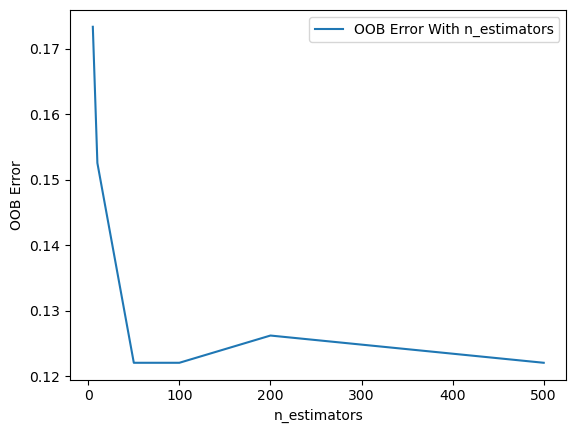

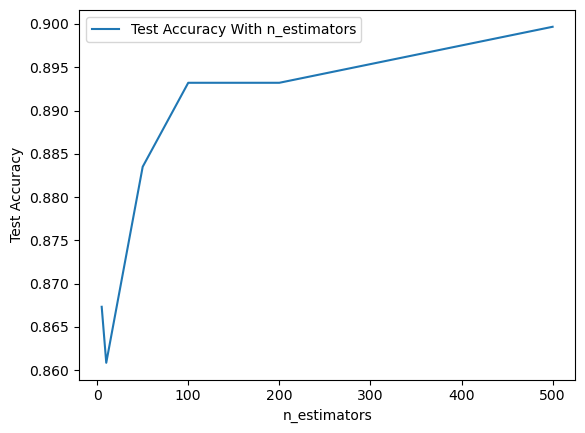

In [35]:
run_bagging()

### Conclusion:

When the number of estimators is increased, the accuracy of the model is increased and OOBE is decreased. The model is more stable and less overfitting. The model is more robust and has a better generalization.
It's also noticed that the rate of reduction in OOB error is decreased when the number of estimators is increased to a certain point and same for the increase in accuracy.
we can conclude that having so many estimators is not always the best choice, as you can see from the charts the accuracy is maximized at 100 estimators and the OOB error is minimized at 100 estimators.

## AdaBoost from Scratch

In [36]:
class GenericBoosting:

    def __init__(self, n_estimators):
        self.n_estimators = n_estimators

    def create_estimator(self):
        # create a decision stump as a weak estimator
        return DecisionTreeClassifier(max_depth=1, random_state=0)

    def fit_and_predict(self, X_train, Y_train, X_test, Y_test):
        # apply AdaBoost on weak estimators
        # convert the targets to {-1, 1} instead of {0, 1}
        Y_train = 2 * Y_train - 1
        Y_test = 2 * Y_test - 1
        
        ## initialize the training and test data with empty array placeholders
        pred_train = np.empty((self.n_estimators, X_train.shape[0]))
        pred_test = np.empty((self.n_estimators, X_test.shape[0]))
        
        # initialize weights of the points
        W = np.ones((X_train.shape[0],)) / X_train.shape[0]

        # loop over the boosting iterations 
        for idx in range(self.n_estimators): 

            # create and fit a new decision stump
            model = self.create_estimator().fit(X_train, Y_train, sample_weight=W)

            # predict classes for the training data and test data
            pred_train_idx = model.predict(X_train)
            pred_test_idx = model.predict(X_test)

            # TODO: calculate the miss Indicator: that means the points that are misclassified
            #one at misclassified points and zero at correctly classified points
            miss_indicator = (pred_train_idx != Y_train).astype(int)

            # TODO: calculate the error for the current classifier
            cls_err =  np.sum(W * miss_indicator)

            # TODO: calculate current classifier weight
            cls_alpha = 0.5 * np.log((1 - cls_err) / cls_err)

            # TODO: update the weights 
            W = W * np.exp(-cls_alpha * Y_train * pred_train_idx)

            # TODO: add to the overall predictions
            pred_train[idx] = pred_train_idx * cls_alpha
            pred_test[idx] = pred_test_idx * cls_alpha

            # normalize weights 
            W = W / np.sum(W)

        # TODO: return accuracy on train and test sets
        train_accuracy = np.mean(np.sign(np.sum(pred_train, axis=0)) == Y_train)
        test_accuracy = np.mean(np.sign(np.sum(pred_test, axis=0)) == Y_test)
        
        return train_accuracy, test_accuracy

In [37]:
def get_scores(n_estimators):
    # run model boosting and compute train and test accuracy
    model = GenericBoosting(n_estimators=n_estimators)
    train_accuracy, test_accuracy = model.fit_and_predict(X_train, y_train, X_test, y_test)
    return train_accuracy, test_accuracy

In [38]:
def run_boosting():
    n_estimators_options = [5, 10, 50, 100, 200, 500]
    train_accuracies = []
    test_accuracies = []
    for n_estimators in n_estimators_options:
        train_accuracy, test_accuracy = get_scores(n_estimators)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    # TODO: plot the output scores against n_estimators
    plt.plot(n_estimators_options, train_accuracies, label='Train Accuracy With n_estimators')
    plt.xlabel('n_estimators')
    plt.ylabel('Train Accuracy')
    plt.legend()
    plt.show()
    plt.plot(n_estimators_options, test_accuracies, label='Test Accuracy With n_estimators')
    plt.xlabel('n_estimators')
    plt.ylabel('Test Accuracy')
    plt.legend()
    plt.show()

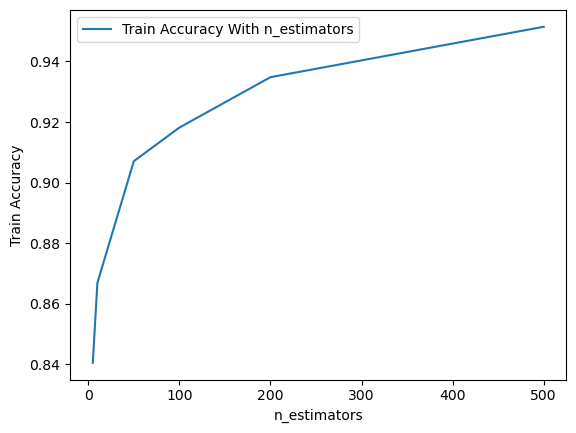

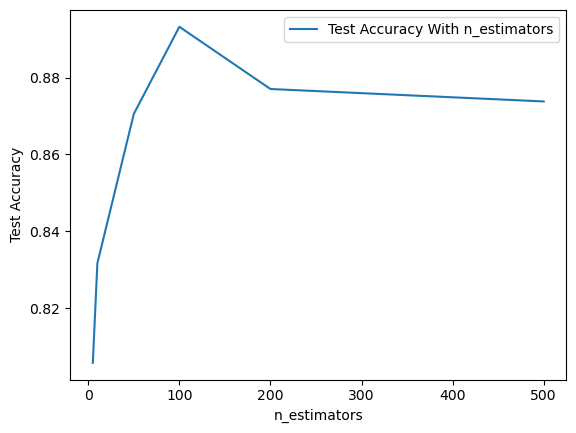

In [39]:
run_boosting()

### Conclusion:
By increasing the number of estimators, the training accuracy always increases as the model learns from the mistakes of the previous estimators. Also, it's noticed that by increasing the number of estimators, the test accuracy increases till a certian point (n_estimators ≃ 100 ) and after this point we find that the test accuracy is decreasing and the model is probably starts to overfit (bad generalization). 